In [1]:
import pandas as pd
df = pd.read_csv("german.data",header=None)
df = pd.DataFrame(df[0].str.split(" ",20).tolist(),columns = ["Acc Status", "Duration", "History","Purpose",
                                                             "Amount","Savings","Employment","InstRate",
                                                             "PersonalStatus","Debtors","ResidentSince",
                                                             "Property","Age","OtherPlans","Housing",
                                                             "ExistingCredits","Job","NoLiable","Telephone",
                                                             "Foreign","Outcome"])
df.Outcome = df.Outcome.replace("1",0)
df.Outcome = df.Outcome.replace("2",1)

In [2]:
df

,Acc Status,Duration,History,Purpose,Amount,Savings,Employment,InstRate,PersonalStatus,Debtors,...,Property,Age,OtherPlans,Housing,ExistingCredits,Job,NoLiable,Telephone,Foreign,Outcome
0,A11,6,A34,A43,1169,A65,A75,4,A93,A101,...,A121,67,A143,A152,2,A173,1,A192,A201,0
1,A12,48,A32,A43,5951,A61,A73,2,A92,A101,...,A121,22,A143,A152,1,A173,1,A191,A201,1
2,A14,12,A34,A46,2096,A61,A74,2,A93,A101,...,A121,49,A143,A152,1,A172,2,A191,A201,0
3,A11,42,A32,A42,7882,A61,A74,2,A93,A103,...,A122,45,A143,A153,1,A173,2,A191,A201,0
4,A11,24,A33,A40,4870,A61,A73,3,A93,A101,...,A124,53,A143,A153,2,A173,2,A191,A201,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,A14,12,A32,A42,1736,A61,A74,3,A92,A101,...,A121,31,A143,A152,1,A172,1,A191,A201,0
996,A11,30,A32,A41,3857,A61,A73,4,A91,A101,...,A122,40,A143,A152,1,A174,1,A192,A201,0
997,A14,12,A32,A43,804,A61,A75,4,A93,A101,...,A123,38,A143,A152,1,A173,1,A191,A201,0
998,A11,45,A32,A43,1845,A61,A73,4,A93,A101,...,A124,23,A143,A153,1,A173,1,A192,A201,1


In [3]:
import cdt

No GPU automatically detected. Setting SETTINGS.GPU to 0, and SETTINGS.NJOBS to cpu_count.


In [4]:
import numpy as np
struct_data = df.copy()
non_numeric_columns = list(struct_data.select_dtypes(exclude=[np.number]).columns)
print(non_numeric_columns)

['Acc Status', 'Duration', 'History', 'Purpose', 'Amount', 'Savings', 'Employment', 'InstRate', 'PersonalStatus', 'Debtors', 'ResidentSince', 'Property', 'Age', 'OtherPlans', 'Housing', 'ExistingCredits', 'Job', 'NoLiable', 'Telephone', 'Foreign']


In [5]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
for col in non_numeric_columns:
    struct_data[col] = le.fit_transform(struct_data[col])

struct_data.head(5)

,Acc Status,Duration,History,Purpose,Amount,Savings,Employment,InstRate,PersonalStatus,Debtors,...,Property,Age,OtherPlans,Housing,ExistingCredits,Job,NoLiable,Telephone,Foreign,Outcome
0,0,27,4,4,50,4,4,3,2,0,...,0,48,2,1,1,2,0,1,0,0
1,1,24,2,4,725,0,2,1,1,0,...,0,3,2,1,0,2,0,0,0,1
2,3,2,4,7,323,0,3,1,2,0,...,0,30,2,1,0,1,1,0,0,0
3,0,21,2,3,846,0,3,1,2,2,...,1,26,2,2,0,2,1,0,0,0
4,0,11,3,0,684,0,2,2,2,0,...,3,34,2,2,1,2,1,0,0,1


In [6]:
glasso = cdt.independence.graph.Glasso()
skeleton = glasso.predict(struct_data)
print(skeleton)

In [7]:
import networkx as nx
print(nx.adjacency_matrix(skeleton).todense())

[[ 7.64199759e-01  2.58545356e-03 -1.04670143e-01 -2.13368867e-02
   1.00602615e-04 -9.72999472e-02 -3.87409191e-02  7.81476398e-03
  -8.82710868e-03  1.72787343e-01  6.16134944e-02  0.00000000e+00
  -5.89446037e-04 -3.43541952e-04  0.00000000e+00  0.00000000e+00
  -3.20375299e-02  5.33776898e-04 -4.26157175e-02  0.00000000e+00
   5.73018922e-01]
 [ 2.58545356e-03  1.21655314e-02  4.20301189e-04 -3.43446865e-03
  -1.67502749e-05 -1.74627945e-04 -3.79148085e-03  1.45427642e-02
  -2.07189748e-03 -2.76778693e-03  3.50996760e-04 -3.23936514e-03
   1.86745392e-05 -5.62706506e-03 -1.57978748e-02  4.65207140e-03
  -1.07274065e-02 -1.58263356e-02  0.00000000e+00 -7.59757897e-03
  -9.27607232e-03]
 [-1.04670143e-01  4.20301189e-04  1.13345451e+00  4.16874003e-02
   4.81760726e-05  6.69916174e-03 -5.46826358e-02 -3.10941633e-02
   0.00000000e+00  1.21007066e-02 -5.64488398e-04  4.40579487e-02
  -5.81550595e-03 -1.80635391e-01 -4.22278391e-02 -8.33357251e-01
   0.00000000e+00  0.00000000e+00 -2.5

In [8]:
new_skeleton = cdt.utils.graph.remove_indirect_links(skeleton, alg = 'aracne')
print(nx.adjacency_matrix(new_skeleton).todense())

[[7.64199759e-01 0.00000000e+00 0.00000000e+00 0.00000000e+00
  0.00000000e+00 0.00000000e+00 0.00000000e+00 7.81476398e-03
  0.00000000e+00 1.72787343e-01 6.16134944e-02 0.00000000e+00
  0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
  0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
  5.73018922e-01]
 [0.00000000e+00 1.21655314e-02 4.20301189e-04 0.00000000e+00
  0.00000000e+00 0.00000000e+00 0.00000000e+00 1.45427642e-02
  0.00000000e+00 0.00000000e+00 3.50996760e-04 0.00000000e+00
  1.86745392e-05 0.00000000e+00 0.00000000e+00 4.65207140e-03
  0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
  0.00000000e+00]
 [0.00000000e+00 4.20301189e-04 1.13345451e+00 4.16874003e-02
  4.81760726e-05 0.00000000e+00 0.00000000e+00 0.00000000e+00
  0.00000000e+00 0.00000000e+00 0.00000000e+00 4.40579487e-02
  0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
  0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
  3.18592264e-01]
 [0.00000000e+00

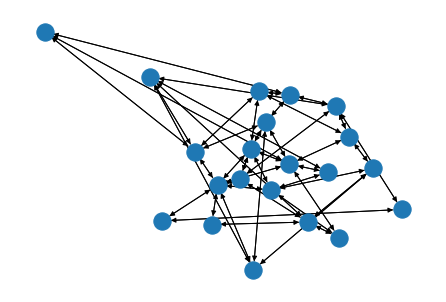

In [9]:
nx.draw(new_skeleton)

In [20]:
cdt.SETTINGS.rpath = "/Library/Frameworks/R.framework/Versions/Current/Resources/library"

In [17]:
import subprocess
output = subprocess.call(r"/Library/Frameworks/R.framework/Resources/library/", "--vanilla testlib.R", shell=True)
print(output)

TypeError: bufsize must be an integer

In [22]:
import pcalg
model = cdt.causality.graph.GES()
output_graph = model.predict(df, new_skeleton)
print(nx.adjacency_matrix(output_graph).todense())

R Call errored, is R available ?


PermissionError: [Errno 13] Permission denied: '/Library/Frameworks/R.framework/Versions/Current/Resources/library'

In [ ]:
pip install pcalg

In [ ]:
if [[ $TRAVIS_PULL_REQUEST == "false" ]]; then
         openssl aes-256-cbc -K $encrypted_7b48abc79884_key -iv $encrypted_7b48abc79884_iv -in rel_travis.enc -out rel_travis -d;
